In [231]:
%reset

In [232]:
#import packages
import numpy as np
import pandas as pd
from datetime import datetime
#import xclim as xc
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib import gridspec
from sklearn.metrics import r2_score
import seaborn as sns
import numpy as np

In [233]:
import os
#set path for root directory
ROOT_DIR = os.path.abspath(os.curdir)

In [234]:
import sys
#this is to reload the work in progress modules that are not in the current directory
#%reload_ext autoreload
#%autoreload 2
import importlib
from hydroplotting import funcutils as fc
from hydroplotting import plotting as pt
from hydroplotting import metrics as mt
from hydroplotting import efficiency as eff
importlib.reload(mt)
importlib.reload(fc)
importlib.reload(pt)

<module 'hydroplotting.plotting' from '/Users/nicoleta/Desktop/code/Snow_SCL/hydroplotting/plotting.py'>

In [235]:

#get paths for data files
path_Skook_obs = ROOT_DIR + '/Data/Raw/bcqc_47.68000_-121.61000._Skookum_Creek.txt'
path_Skook_model_prism_delta_05 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05.csv'

path_Skook_model_prism_delta_05_1deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_1deg.csv'
path_Skook_model_prism_delta_05_2deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_2deg.csv'
path_Skook_model_prism_delta_05_3deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_3deg.csv'
path_Skook_model_prism_delta_05_4deg = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_delta_05_4deg.csv'

#path_Skook_model_prism_grid_05 = ROOT_DIR + '/Data/Raw/comparison_Pixel.Skookum_Creek_prism_grid_05.csv'

path_flow_model = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05.day'

path_flow_model_1deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_1deg.day'
path_flow_model_2deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_2deg.day'
path_flow_model_3deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_3deg.day'
path_flow_model_4deg = ROOT_DIR + '/Data/Raw/12147600_prism_delta_05_4deg.day'

#df_model_data_Skookum = fc.get_model_dataframe(path_Skook_model)
#ds_model_point_Skookum = fc.model_point_data_xr(df_model_data_Skookum)

path_flow_obs = ROOT_DIR + '/Data/Raw/12147600_ref_short.csv'

df_model_data_Skookum_prism_delta_05 = fc.get_model_dataframe(path_Skook_model_prism_delta_05)
df_model_data_Skookum_prism_delta_05_1deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_1deg)
df_model_data_Skookum_prism_delta_05_2deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_2deg)
df_model_data_Skookum_prism_delta_05_3deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_3deg)
df_model_data_Skookum_prism_delta_05_4deg = fc.get_model_dataframe(path_Skook_model_prism_delta_05_4deg)


#observations
df_snotel_Skookum = fc.snotel_data(path_Skook_obs)
ds_bcbq_obs_Skookum = fc.bcbq_snotel_data_xr(df_snotel_Skookum)



In [236]:
flow_obs = pd.read_csv(path_flow_obs,  header = None)
flow_obs.columns = ['year', 'month', 'day', 'Q_cms']
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
flow_obs = flow_obs.set_index('datetime')
flow_obs['datetime'] = pd.to_datetime(flow_obs[['year', 'month', 'day']])
fc.calc_water_year_apply(flow_obs)
flow_obs['water_year_str'] = flow_obs['water_year'].astype(str)
#flow_obs.Q_cms.plot()

In [237]:
def flow_model_df(path_flow_model):
    flow_model = pd.read_csv(path_flow_model, sep='\s+', header = None)
    flow_model.columns = ['year', 'month', 'day', 'Q_cms']
    flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
    flow_model = flow_model.set_index('datetime')
    flow_model['datetime'] = pd.to_datetime(flow_model[['year', 'month', 'day']])
    #apply water year
    fc.calc_water_year_apply(flow_model)
    flow_model['water_year_str'] = flow_model['water_year'].astype(str)
    return flow_model

flow_model_prism_delta_05 = flow_model_df(path_flow_model)
flow_model_prism_delta_05_1deg = flow_model_df(path_flow_model_1deg)
flow_model_prism_delta_05_2deg = flow_model_df(path_flow_model_2deg)

flow_model_prism_delta_05_3deg = flow_model_df(path_flow_model_3deg)
flow_model_prism_delta_05_4deg = flow_model_df(path_flow_model_4deg)

flow_model_prism_delta_05_by_wy = flow_model_prism_delta_05.groupby(['water_year_str'])
flow_model_prism_delta_05_1deg_by_wy = flow_model_prism_delta_05_1deg.groupby(['water_year_str'])
flow_model_prism_delta_05_2deg_by_wy = flow_model_prism_delta_05_2deg.groupby(['water_year_str'])
flow_model_prism_delta_05_3deg_by_wy = flow_model_prism_delta_05_3deg.groupby(['water_year_str'])
flow_model_prism_delta_05_4deg_by_wy = flow_model_prism_delta_05_4deg.groupby(['water_year_str'])

flow_obs_by_wy = flow_obs.groupby(['water_year_str'])

In [238]:
#df_model_data_Skookum_prism_delta_05

Text(0, 0.5, 'SWE [m]')

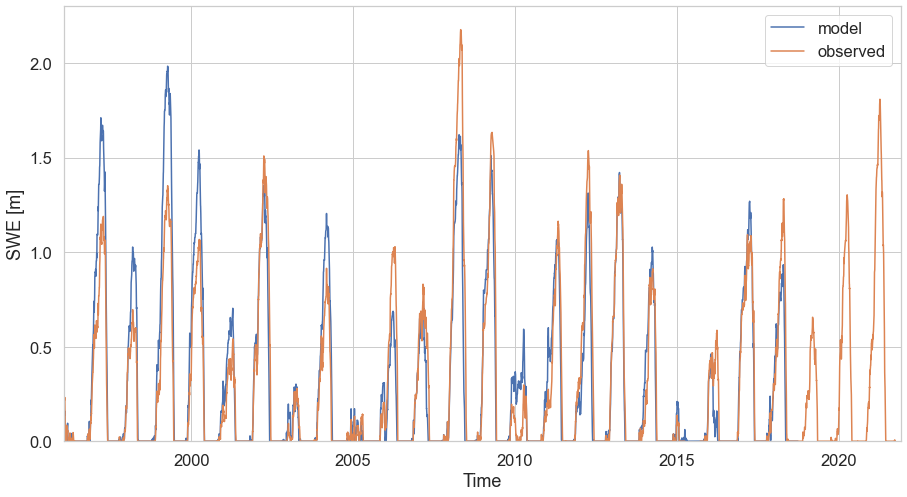

In [239]:
#plot modeled SWE vs. observed at Skookum Creek
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

ax = df_model_data_Skookum_prism_delta_05.plot(kind='line',  y = 'SWE_m', label = 'model', figsize=(15, 8))
df_snotel_Skookum.plot(kind='line',  y = 'SWE_m', label = 'observed', ax = ax)
#df_model_data_Skookum_67.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 67 SWE', ax = ax)
#df_model_data_Skookum_53.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 53 SWE', ax = ax)

ax.set_xlim([datetime(1996, 1, 21), datetime(2021, 12, 1)])
ax.set_ylim([0, 2.3])
plt.xlabel('Time')
plt.ylabel('SWE [m]')


Text(0, 0.5, 'SWE [m]')

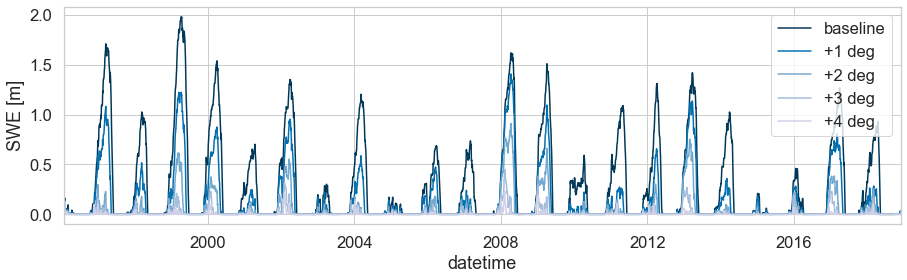

In [240]:
f, axes = plt.subplots(1, 1, figsize=(15, 4))

sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")

#sns.set_theme(style='white', font_scale=1.5)
blue    = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb', '#d0d1e6', '#ece7f2', '#fff7fb']

#fig.tight_layout(h_pad=5, w_pad=5)
#plt.subplots_adjust(hspace=0.2, wspace=0)
#sns.lineplot(x='time', y = 'SWE_m', label = 'observed', data = df_snotel_Skookum, ax=axes)
#sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_99, ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'baseline', data = df_model_data_Skookum_prism_delta_05, color = blue[0], ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = '+1 deg', data = df_model_data_Skookum_prism_delta_05_1deg, color = blue[2], ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = '+2 deg', data = df_model_data_Skookum_prism_delta_05_2deg, color = blue[4], ax=axes)

sns.lineplot(x='datetime', y = 'SWE_m', label = '+3 deg', data = df_model_data_Skookum_prism_delta_05_3deg, color = blue[5], ax=axes)
sns.lineplot(x='datetime', y = 'SWE_m', label = '+4 deg', data = df_model_data_Skookum_prism_delta_05_4deg, color = blue[6], ax=axes)

axes.set_xlim([datetime(1996, 1, 21), datetime(2018, 12, 1)])
axes.set_ylabel('SWE [m]')
#axes.set_ylim([0, 500])

In [241]:
swe_model = df_model_data_Skookum_prism_delta_05.loc['1995-10-01':'2015-04-02']
swe_obs = df_snotel_Skookum.loc['1995-10-01':'2015-04-02']
#swe_obs = swe_obs.fillna(0)
#swe_model = swe_model.fillna(0)
#nse_swe = fc.nse(swe_model.swq, swe_obs.SWE_in)
nse_swe = mt.nse(swe_model.SWE_m.fillna(0), swe_obs.SWE_m.fillna(0))
print('NSE', nse_swe)

R_square = r2_score(swe_model.SWE_m, swe_obs.SWE_m)
print('R2', R_square)
kge_swe = mt.kge(swe_model.SWE_m.values, swe_obs.SWE_m.values)
rmse_swe = mt.rmse(swe_model.SWE_m.values, swe_obs.SWE_m.values)
print('KGE', kge_swe)
print('RMSE', rmse_swe)
#the lse metric is controversial
#lse_swe = mt.lse(swe_model.SWE_m.values, swe_obs.SWE_m.values)
pvse_swe = eff.PVSE_prime(swe_model.SWE_m.values, swe_obs.SWE_m.values)
#print('LSE', lse_swe)
print('PVSE', pvse_swe)
LBE_swe = eff.LBE(swe_model.SWE_m.values, swe_obs.SWE_m.values)
#LBEm_hat_swe = eff.LBEm(swe_model.swq.values, swe_obs.SWE_in.values)
#print('LBE hat', LBE_hat_swe)
#print('LBEm hat', LBEm_hat_swe)

NSE 0.8186312421028488
R2 0.8327565110234787
KGE 0.8810079426709273
RMSE 0.18279474819016214
PVSE 0.9243161887845024


In [242]:
#swe_model.swq
#flow_model_ = flow_model.loc['1995-10-01':'2015-04-02']
#flow_obs_ = flow_obs.loc['1995-10-01':'2015-04-02']
flow_model_ = flow_model_prism_delta_05.loc['1981-10-01':'2020-12-31']
flow_obs_ = flow_obs.loc['1981-10-01':'2020-12-31']
#swe_obs = swe_obs.fillna(0)
#swe_model = swe_model.fillna(0)
#nse_swe = fc.nse(swe_model.swq, swe_obs.SWE_in)
nse_flow = mt.nse(flow_model_.Q_cms, flow_obs_.Q_cms)
print('NSE', nse_flow)

R_square = r2_score(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('R2', R_square)
kge_flow = mt.kge(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
rmse_flow = mt.rmse(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('KGE', kge_flow)
print('RMSE', rmse_flow)
#lse_flow = mt.lse(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
pvse_flow = eff.PVSE_prime(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
#print('LSE', lse_swe)
print('PVSE', pvse_swe)
LBE_flow= eff.LBE(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
#LBEm_hat_flow = eff.LBEm(flow_model_.Q_cms.values, flow_obs_.Q_cms.values)
print('LBE', LBE_flow)
#print('LBE_hat', LBEm_hat_flow)
#print('LBEm hat', LBEm_hat_s


NSE 0.613046972001053
R2 0.29644059405111456
KGE 0.6301309130325972
RMSE 56.07702067822514
PVSE 0.9243161887845024
LBE 0.5815127824711551


Text(0, 0.5, 'SWE [in]')

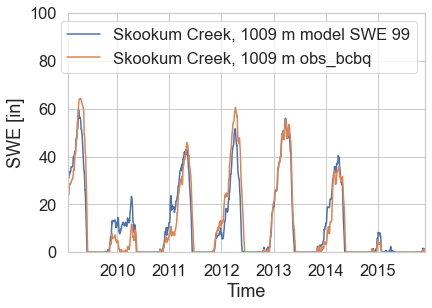

In [243]:
#plot modeled SWE vs. observed at Skookum Creek
ax = df_model_data_Skookum_prism_delta_05.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model SWE 99')
df_snotel_Skookum.plot(kind='line',  y = 'SWE_in', label = 'Skookum Creek, 1009 m obs_bcbq', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)
#df_model_data_Skookum_99.plot(kind='line',  y = 'swq', label = 'Skookum Creek, 1009 m model 99 SWE', ax = ax)

ax.set_xlim([datetime(2009, 1, 21), datetime(2015, 12, 1)])
ax.set_ylim([0, 100])
plt.xlabel('Time')
plt.ylabel('SWE [in]')

(0.0, 1.0)

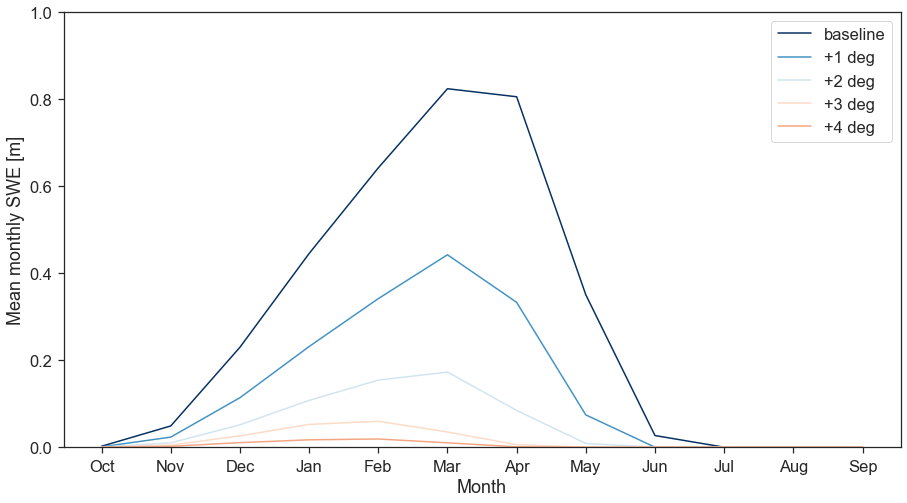

In [299]:
#plot SWE from different model runs - sensitivity to warming

sns.set_context("paper")
sns.set(font_scale=1.5)
#sns.set_style("whitegrid")
sns.set_style("white")
sns.set_style("ticks")
pebble   = ['#053061','#2166ac','#4393c3','#92c5de','#d1e5f0','#fddbc7','#f4a582','#d6604d','#b2182b','#67001f']


period_all_model_monthly_mean_bs_ = df_model_data_Skookum_prism_delta_05.loc['1995-10-01':'2020-09-30']
period_all_model_monthly_mean_1deg_ = df_model_data_Skookum_prism_delta_05_1deg.loc['1995-10-01':'2020-09-30']
period_all_model_monthly_mean_2deg_ = df_model_data_Skookum_prism_delta_05_2deg.loc['1995-10-01':'2020-09-30']
period_all_model_monthly_mean_3deg_ = df_model_data_Skookum_prism_delta_05_3deg.loc['1995-10-01':'2020-09-30']
period_all_model_monthly_mean_4deg_ = df_model_data_Skookum_prism_delta_05_4deg.loc['1995-10-01':'2020-09-30']

period_all_obs = df_snotel_Skookum.loc['1981-10-01':'2020-09-30']
period_all_obs_monthly_mean = period_all_obs.groupby(period_all_obs.index.month).mean()

period_all_model_monthly_mean_bs = period_all_model_monthly_mean_bs_.groupby(period_all_model_monthly_mean_bs_.index.month).mean()
period_all_model_monthly_mean_1deg = period_all_model_monthly_mean_1deg_.groupby(period_all_model_monthly_mean_1deg_.index.month).mean()
period_all_model_monthly_mean_2deg = period_all_model_monthly_mean_2deg_.groupby(period_all_model_monthly_mean_2deg_.index.month).mean()
period_all_model_monthly_mean_3deg = period_all_model_monthly_mean_3deg_.groupby(period_all_model_monthly_mean_3deg_.index.month).mean()
period_all_model_monthly_mean_4deg = period_all_model_monthly_mean_4deg_.groupby(period_all_model_monthly_mean_4deg_.index.month).mean()

def month_wy_for_plotting(calendar_monthly_mean):
    temp = calendar_monthly_mean.loc[10:12]
    model_monthly_mean_plot = pd.concat([temp, calendar_monthly_mean]).reset_index(drop = True)
    model_monthly_mean_plot.drop(model_monthly_mean_plot.tail(3).index, inplace = True)
    return model_monthly_mean_plot

period_all_model_monthly_mean_plot_bs = month_wy_for_plotting(period_all_model_monthly_mean_bs)
period_all_model_monthly_mean_plot_1deg = month_wy_for_plotting(period_all_model_monthly_mean_1deg)
period_all_model_monthly_mean_plot_2deg = month_wy_for_plotting(period_all_model_monthly_mean_2deg)
period_all_model_monthly_mean_plot_3deg = month_wy_for_plotting(period_all_model_monthly_mean_3deg)
period_all_model_monthly_mean_plot_4deg = month_wy_for_plotting(period_all_model_monthly_mean_4deg)
period_all_model_monthly_mean_plot_bs["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
period_all_model_monthly_mean_plot_1deg["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
period_all_model_monthly_mean_plot_2deg["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
period_all_model_monthly_mean_plot_3deg["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']
period_all_model_monthly_mean_plot_4deg["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

period_all_obs_monthly_mean_plot = month_wy_for_plotting(period_all_obs_monthly_mean)

period_all_obs_monthly_mean_plot["Month"] =['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep']

f, axes = plt.subplots(1, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
blue    = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb', '#d0d1e6', '#ece7f2', '#fff7fb']

#fig.tight_layout(h_pad=5, w_pad=5)
#plt.subplots_adjust(hspace=0.2, wspace=0)
#sns.lineplot(x='time', y = 'SWE_m', label = 'observed', data = df_snotel_Skookum, ax=axes)
#sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_99, ax=axes)
sns.lineplot(x='Month', y = 'SWE_m', label = 'baseline', data = period_all_model_monthly_mean_plot_bs, color = pebble[0], ax=axes)
sns.lineplot(x='Month', y = 'SWE_m', label = '+1 deg', data = period_all_model_monthly_mean_plot_1deg, color = pebble[2], ax=axes)
sns.lineplot(x='Month', y = 'SWE_m', label = '+2 deg', data = period_all_model_monthly_mean_plot_2deg, color = pebble[4], ax=axes)
sns.lineplot(x='Month', y = 'SWE_m', label = '+3 deg', data = period_all_model_monthly_mean_plot_3deg, color = pebble[5], ax=axes)
sns.lineplot(x='Month', y = 'SWE_m', label = '+4 deg', data = period_all_model_monthly_mean_plot_4deg, color = pebble[6], ax=axes)
#sns.lineplot(x='Month', y = 'SWE_m', label = 'historic', data = period_all_obs_monthly_mean_plot, color = 'r', ax=axes)
#axes.set_xlim([datetime(1996, 1, 21), datetime(2018, 12, 1)])
axes.set_ylabel('Mean monthly SWE [m]')
axes.set_ylim([0, 1])
#sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [245]:
period_all_model_monthly_mean_plot_4deg

,prec_point,swq,tmean_point,tmax_point,tmin_point,prec_ref,swe,tmean_ref,tmax_ref,tmin_ref,SWE_m,Month
0,0.479376,0.000299,8.575482,12.333021,5.599120,0.493806,49.810702,38.701704,43.516853,0.067613,0.000008,Oct
1,0.717738,0.079801,4.014748,6.353309,1.897428,0.729467,41.721257,32.966257,37.006052,1.236000,0.002027,Nov
2,0.627735,0.414775,1.439973,3.303271,-0.518347,0.624774,36.847971,28.748609,32.567243,6.663097,0.010535,Dec
3,0.694473,0.668798,1.421767,3.277442,-0.454547,0.738985,38.459272,29.806736,33.822263,14.060774,0.016987,Jan
4,0.525810,0.742935,1.180984,3.290928,-1.002833,0.620177,39.636757,28.498043,33.024157,21.687129,0.018871,Feb
5,0.535712,0.396554,2.242157,4.436887,-0.120433,0.581183,42.722027,29.401154,34.527651,30.009935,0.010072,Mar
6,0.348921,0.032813,5.054677,8.069749,2.167919,0.420139,48.754567,32.582416,38.900517,33.177562,0.000833,Apr
7,0.249766,0.000128,10.412643,14.804561,6.365040,0.298324,53.986260,37.966829,44.797209,18.063221,0.000003,May
8,0.217596,0.000000,13.807814,18.783816,9.215294,0.258986,58.040367,42.747264,49.502553,2.557420,0.000000,Jun
9,0.057313,0.000000,17.984174,23.670338,12.531645,0.095652,66.950659,49.119492,56.923723,0.008199,0.000000,Jul


(0.0, 600.0)

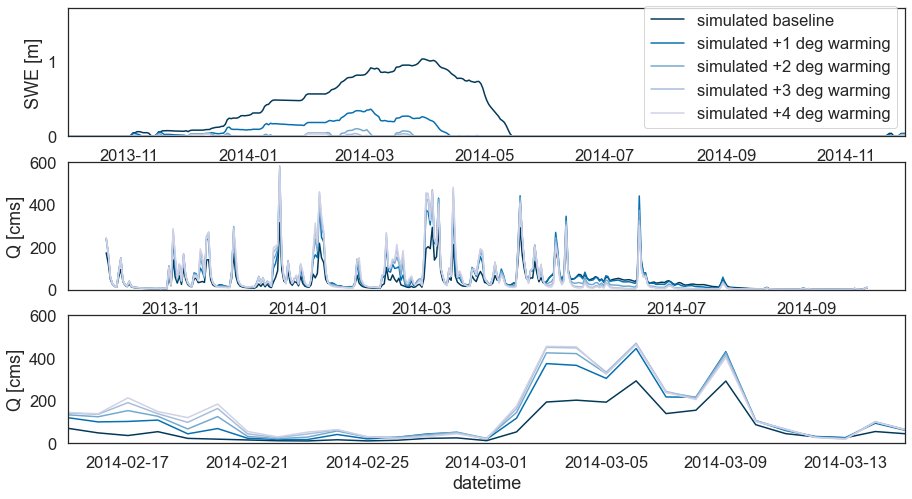

In [246]:
f, axes = plt.subplots(3, 1, figsize=(15, 8))
# https://gist.github.com/hbristow/f48b0d1e15d8cf67789a
#sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# ----------------------------------------------------------------------------
# Sequential Colormaps
# ----------------------------------------------------------------------------
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_style("ticks")

blue    = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb', '#d0d1e6', '#ece7f2', '#fff7fb']

sns.set_theme(style='white', font_scale=1.5)
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_prism_delta_05, ax=axes[0], color = blue[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes[0], color = blue[2])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes[0], color  =  blue[4])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes[0], color = blue[5])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes[0], color = blue[6])

axes[0].set_xlim([datetime(2013, 10, 1), datetime(2014, 12, 1)])
axes[0].set_ylim([0, 1.7])
axes[0].set_ylabel('SWE [m]')

wy = '2014'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[1], color = blue[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[1], color = blue[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[1], color = blue[4])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[1], color = blue[5])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[1], color = blue[6])

axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 600])
axes[0].set_xlim([datetime(2013, 10, 1), datetime(2014, 12, 1)])

wy = '2014'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[2], color = blue[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[2], color = blue[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[2], color = blue[4])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[2], color = blue[5])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[2], color = blue[6])

#axes[2].set_xlim([datetime(2014, 3, 1), datetime(2014, 3, 15)])
axes[2].set_xlim([datetime(2014, 2, 15), datetime(2014, 3, 15)])
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 600])





#plt.style.use('seaborn-paper')


(0.0, 1200.0)

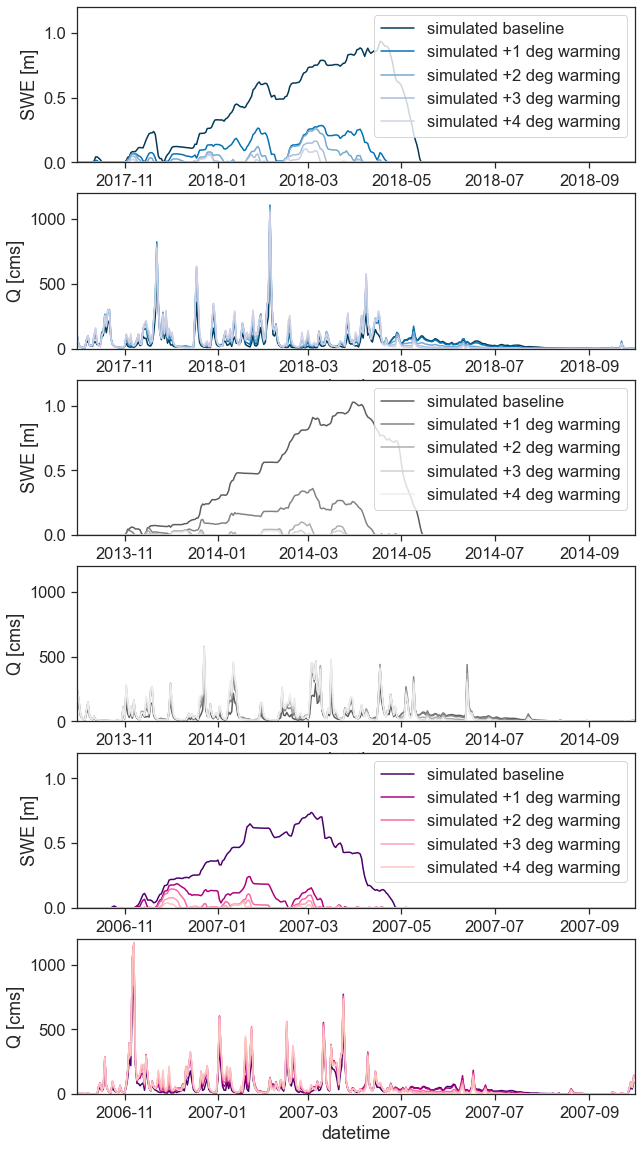

In [293]:
f, axes = plt.subplots(6, 1, figsize=(10, 20))
# https://gist.github.com/hbristow/f48b0d1e15d8cf67789a
#sns.color_palette("ch:s=.25,rot=-.25", as_cmap=True)
# ----------------------------------------------------------------------------
# Sequential Colormaps
# ----------------------------------------------------------------------------
sns.set_context("paper")
sns.set(font_scale=1.5)
sns.set_style("whitegrid")
sns.set_style("ticks")

blue    = ['#023858', '#045a8d', '#0570b0', '#3690c0', '#74a9cf', '#a6bddb', '#d0d1e6', '#ece7f2', '#fff7fb']
grey = sns.color_palette("Greys").as_hex()
rose    = ['#49006a', '#7a0177', '#ae017e', '#dd3497', '#f768a1', '#fa9fb5', '#fcc5c0', '#fde0dd', '#fff7f3']


#sns.set_theme(style='white', font_scale=1.5)

sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_prism_delta_05, ax=axes[0], color = blue[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes[0], color = blue[2])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes[0], color  =  blue[4])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes[0], color = blue[5])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes[0], color = blue[6])

axes[0].set_xlim([datetime(2017, 10, 1), datetime(2018, 10, 1)])
axes[0].set_ylim([0, 1.2])
axes[0].set_ylabel('SWE [m]')

wy = '2018'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[1], color = blue[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[1], color = blue[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[1], color = blue[4])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[1], color = blue[5])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[1], color = blue[6])

axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 1200])
axes[1].set_xlim([datetime(2017, 10, 1), datetime(2018, 10, 1)])

sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_prism_delta_05, ax=axes[2], color = grey[4])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes[2], color = grey[3])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes[2], color  =  grey[2])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes[2], color = grey[1])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes[2], color = grey[0])

axes[2].set_xlim([datetime(2013, 10, 1), datetime(2014, 10, 1)])
axes[2].set_ylim([0, 1.2])
axes[2].set_ylabel('SWE [m]')

wy = '2014'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[3], color = 'k')
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[3], color = grey[4])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[3], color = grey[3])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[3], color = grey[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[3], color = grey[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[3], color = grey[0])

#axes[2].set_xlim([datetime(2014, 3, 1), datetime(2014, 3, 15)])
axes[3].set_xlim([datetime(2013, 10, 1), datetime(2014, 10, 1)])
axes[3].set_ylabel('Q [cms]')
axes[3].set_ylim([0, 1200])

sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated baseline', data = df_model_data_Skookum_prism_delta_05, ax=axes[4], color = rose[0])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +1 deg warming', data = df_model_data_Skookum_prism_delta_05_1deg, ax=axes[4], color = rose[2])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +2 deg warming', data = df_model_data_Skookum_prism_delta_05_2deg, ax=axes[4], color  =  rose[4])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +3 deg warming', data = df_model_data_Skookum_prism_delta_05_3deg, ax=axes[4], color = rose[5])
sns.lineplot(x='datetime', y = 'SWE_m', label = 'simulated +4 deg warming', data = df_model_data_Skookum_prism_delta_05_4deg, ax=axes[4], color = rose[6])

axes[4].set_xlim([datetime(2006, 10, 1), datetime(2007, 10, 1)])
axes[4].set_ylim([0, 1.2])
axes[4].set_ylabel('SWE [m]')

wy = '2007'
#sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group(wy), ax=axes[5], color = rose[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group(wy), ax=axes[5], color = rose[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group(wy), ax=axes[5], color = rose[4])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group(wy), ax=axes[5], color = rose[5])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group(wy), ax=axes[5], color = rose[6])

#axes[2].set_xlim([datetime(2014, 3, 1), datetime(2014, 3, 15)])
axes[5].set_xlim([datetime(2006, 10, 1), datetime(2007, 10, 1)])
axes[5].set_ylabel('Q [cms]')
axes[5].set_ylim([0, 1200])




#plt.style.use('seaborn-paper')



In [267]:
grey = sns.color_palette("Greys").as_hex()

In [14]:
def plotSWE_P_T_Q_model(t, sP, sSWE, sT, sQ, tQm, sQm, time_period):
    fig = plt.figure()
    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1])

    # SWE plot
    ax = plt.subplot(gs[1])

    ax.plot(t, sSWE, color="r")
    # Create secondary axes
    ax2 = ax.twinx()
    c = 'black'
    ax2.bar(t, -sP, color = c)
    #plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    # fix the axis labels
    #convert P to mm/day

    max_pre = max(sP)

    #y2_ticks = np.linspace(0, max_pre, max_pre + 1)

    #y2_ticks = np.rint(y2_ticks)

    #y2_ticklabels = [str(i) for i in y2_ticks]

    #ax2.set_yticks(-1 * y2_ticks)
    #ax2.set_yticklabels(y2_ticklabels)

    ax.set_xlim(time_period)

    ax.set_ylabel('SWE[m]', color='k')

    ax2.set_ylabel('P[mm/day]', color='k')

    #ax.tick_params(axis='y', colors='k')
    #ax.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax.yaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))

    ax.set_ylim(0, 1.5)
    plt.grid(False)
    #ax.set_ylim(0, np.nanmax(sSWE)*1.2)
    ax.set_xlim(time_period)
    plt.setp(ax.get_xticklabels(), visible=False)
    # temperature plot

    ax2 = plt.subplot(gs[0])

    ax2.plot(t, sT)
    #ax2.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('T [deg C]')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(time_period)

    ax2 = plt.subplot(gs[2])

    sQ_p = sQ.loc[t]
    sQm_p = sQm.loc[tQm]

    ax2.plot(t, sQ_p)
    ax2.plot(tQm, sQm_p)
    #ax2.xaxis.grid(visible=None, which='major', color='.9', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.9', linestyle='-')
    ax2.set_ylabel('Q [cms])')
    ax2.set_ylim([0, 1000])
    ax2.set_xlim(min(t), max(t))
    ax2.set_xlabel('Time')
    ax2.tick_params(axis='x', labelrotation=45)
    ax2.legend(['observed', 'simulated'])


    plt.tight_layout()
    #ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax2.set_xlim(time_period)
    #ax3.set_xlim(time_period)
    #ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    #plt.style.use('seaborn-paper')

    plt.show()

    #plt.savefig(filename,format='pdf')
    plt.close(fig)


In [19]:
def plotSWE_P_T_Q_model_SWE_model(t, tswe_m, sP, sSWE, mSWE, sT, sQ, tQm, sQm, time_period):
    fig = plt.figure()
    #gs = gridspec.GridSpec(2, 1, height_ratios=[1, 2])
    gs = gridspec.GridSpec(3, 1, height_ratios=[1, 2, 1])

    # SWE plot
    ax = plt.subplot(gs[1])

    ax.plot(t, sSWE, color="r")
    ax.plot(tswe_m, mSWE, color = 'k')
    # Create secondary axes
    ax2 = ax.twinx()
    c = 'black'
    ax2.bar(t, -sP, color = c)
    #plt.bar(x_pos, height, color=(0.2, 0.4, 0.6, 0.6))
    # fix the axis labels
    #convert P to mm/day

    max_pre = max(sP)

    #y2_ticks = np.linspace(0, max_pre, max_pre + 1)

    #y2_ticks = np.rint(y2_ticks)

    #y2_ticklabels = [str(i) for i in y2_ticks]

    #ax2.set_yticks(-1 * y2_ticks)
    #ax2.set_yticklabels(y2_ticklabels)

    ax.set_xlim(time_period)

    ax.set_ylabel('SWE[m]', color='k')

    ax2.set_ylabel('P[mm/day]', color='k')

    #ax.tick_params(axis='y', colors='k')
    #ax.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax.yaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    ax.set_xlim(min(t), max(t))

    ax.set_ylim(0, 1.5)
    plt.grid(False)
    #ax.set_ylim(0, np.nanmax(sSWE)*1.2)
    ax.set_xlim(time_period)
    plt.setp(ax.get_xticklabels(), visible=False)
    # temperature plot

    ax2 = plt.subplot(gs[0])

    ax2.plot(t, sT)
    #ax2.xaxis.grid(visible=None, which='major', color='.7', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.7', linestyle='-')
    ax2.set_ylabel('T [deg C]')
    ax2.set_xlim(min(t), max(t))
    plt.setp(ax2.get_xticklabels(), visible=False)
    ax2.set_xlim(time_period)

    ax2 = plt.subplot(gs[2])

    sQ_p = sQ.loc[t]
    sQm_p = sQm.loc[tQm]

    ax2.plot(t, sQ_p)
    ax2.plot(tQm, sQm_p)
    #ax2.xaxis.grid(visible=None, which='major', color='.9', linestyle='-')
    #ax2.yaxis.grid(visible=None, which='major', color='0.9', linestyle='-')
    ax2.set_ylabel('Q [cms])')
    ax2.set_ylim([0, 1000])
    ax2.set_xlim(min(t), max(t))
    ax2.set_xlabel('Time')
    ax2.tick_params(axis='x', labelrotation=45)
    ax2.legend(['observed', 'simulated'])


    plt.tight_layout()
    #ax2.invert_yaxis()
    plt.gcf().subplots_adjust(bottom=0.15)
    ax2.set_xlim(time_period)
    #ax3.set_xlim(time_period)
    #ax2.set_xticklabels(ax2.get_xticks(), rotation = 45)
    #plt.style.use('seaborn-paper')

    plt.show()

    #plt.savefig(filename,format='pdf')
    plt.close(fig)


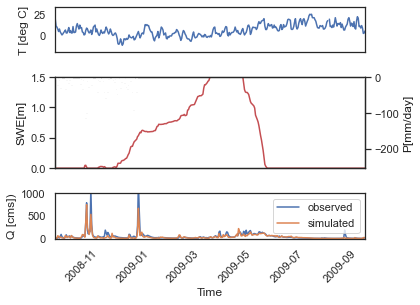

/var/folders/cj/b1yrjqfd1kj1xd6tryxsg1_r0000gn/T/ipykernel_60763/999463478.py:8: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [15]:
#time_period = [datetime(2011, 10, 1), datetime(2012, 10, 1)]
#time_period = [datetime(2006, 10, 1), datetime(2007, 10, 1)]

time_period = [datetime(2008, 10, 1), datetime(2009, 10, 1)]
plotSWE_P_T_Q_model(df_snotel_Skookum.index,
              df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
              df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, flow_model_prism_delta_05.index, flow_model_prism_delta_05.Q_cms, time_period)
plt.style.use('seaborn-paper')
#ax.set_ylim(0, 2)
#ax.legend(['simulated', 'observed'])

#plotSWE_P_T_Q(df_snotel_Skookum.index,
#              df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
#              df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, time_period)
#plt.style.use('seaborn-paper')
#ax.set_ylim(0, 2)

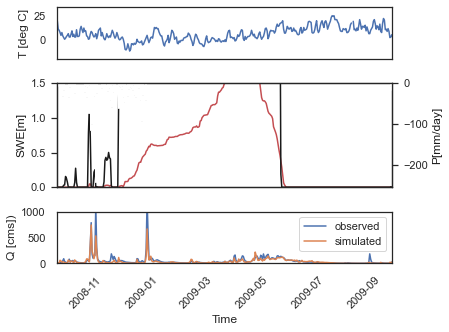

/var/folders/cj/b1yrjqfd1kj1xd6tryxsg1_r0000gn/T/ipykernel_60763/3233875697.py:12: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-paper')


In [28]:
time_period = [datetime(2008, 10, 1), datetime(2009, 10, 1)]
plotSWE_P_T_Q_model_SWE_model(df_snotel_Skookum.index,
                              df_model_data_Skookum_prism_delta_05.index,
                              df_snotel_Skookum.daily_P_in.fillna(0) * 25.4,
                              df_snotel_Skookum.SWE_m,
                              df_model_data_Skookum_prism_delta_05.swq,
                              df_snotel_Skookum.Tmean_C,
                              flow_obs.Q_cms,
                              flow_model_prism_delta_05.index,
                              flow_model_prism_delta_05.Q_cms,
                              time_period)
plt.style.use('seaborn-paper')



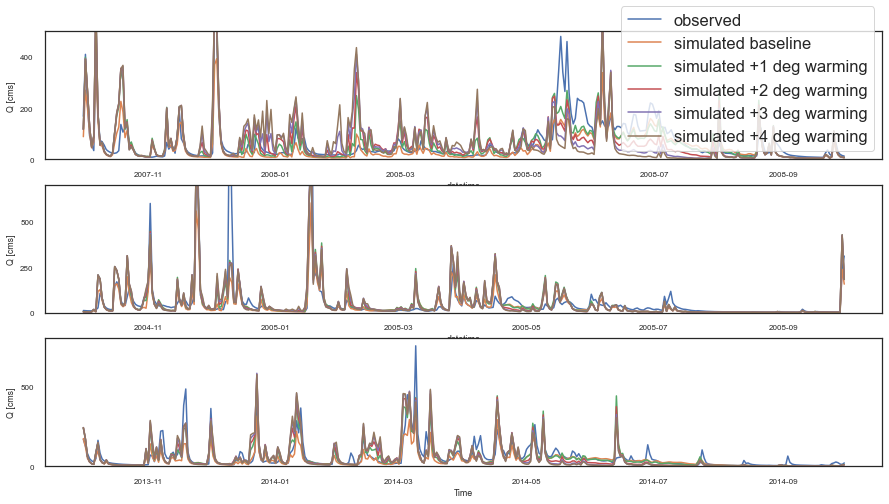

In [95]:
#plot three years
#select data neutral years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2008'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2008'), ax=axes[0])

axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 500])

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2005'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2005'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 700])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2014'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2014'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 800])

plt.show()


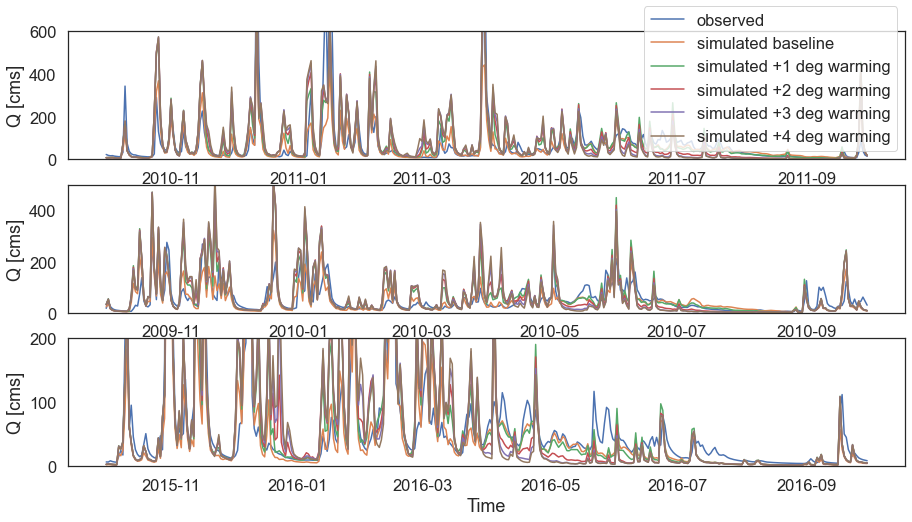

In [96]:
#plot three years
#select data warm years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2011'), ax=axes[0])



axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 600])

#axes[0].set_xlim([datetime(2019, 10, 1), datetime(2020, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2010'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2010'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 500])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2016'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2016'), ax=axes[2])

# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 200])

plt.show()

ValueError: day is out of range for month

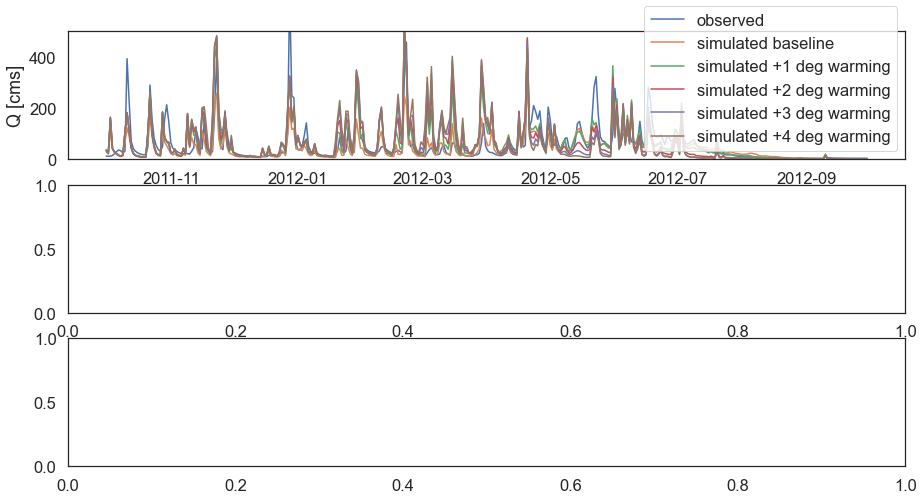

In [98]:
#plot three years
#select data cold years

f, axes = plt.subplots(3, 1, figsize=(15, 8))
sns.set_theme(style='white', font_scale=1.5)
#fig.tight_layout(h_pad=5, w_pad=5)
plt.subplots_adjust(hspace=0.2, wspace=0)
sns.lineplot(x='datetime', y = 'Q_cms', label = 'observed', data = flow_obs_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated baseline', data = flow_model_prism_delta_05_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +1 deg warming', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +2 deg warming', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +3 deg warming', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2012'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', label = 'simulated +4 deg warming', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2012'), ax=axes[0])

axes[0].set_ylabel('Q [cms]')
axes[0].set_ylim([0, 500])

axes[0].set_xlim([datetime(2011, 10, 1), datetime(2012, 9, 31)])

sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_obs_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms',  data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[0])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2011'), ax=axes[1])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2011'), ax=axes[1])

plt.ylabel( "Q [cms]")
axes[1].set_ylabel('Q [cms]')
axes[1].set_ylim([0, 600])

sns.lineplot(x='datetime', y = 'Q_cms', data = flow_obs_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_1deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_2deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_3deg_by_wy.get_group('2012'), ax=axes[2])
sns.lineplot(x='datetime', y = 'Q_cms', data = flow_model_prism_delta_05_4deg_by_wy.get_group('2012'), ax=axes[2])


# Set label for x-axis
axes[2].set_xlabel( "Time")
axes[2].set_ylabel('Q [cms]')
axes[2].set_ylim([0, 200])

plt.show()

In [ ]:

time_period = [datetime(2008, 10, 1), datetime(2009, 9, 30)]

plotSWE_P_T_Q_model(df_snotel_Skookum.index,
                    df_snotel_Skookum.daily_P_in.fillna(0)*25.4,
                    df_snotel_Skookum.SWE_m, df_snotel_Skookum.Tmean_C, flow_obs.Q_cms, flow_model.index, flow_model.Q_cms, time_period)

#ax.set_ylim(0, 2)